<a href="https://colab.research.google.com/github/MazonSzymon/Project_COVID_portfolio/blob/main/Project_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ***Analysis of investing at GPW in 2020*** 

---


#Downloading libraries and creating wig20 table

In [1]:
!git clone https://github.com/MazonSzymon/Project_COVID_portfolio.git
import sys
sys.path.append('/content/Project_COVID_portfolio/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr 
%load_ext google.colab.data_table
import functions as WIG20 # My own functions
#Set up plot
from cycler import cycler
plt.style.use('ggplot')
plt.rc('axes', facecolor='white', edgecolor='black', grid = False, axisbelow = True)
plt.rc('grid',color='gray', linestyle='solid', linewidth=0.5)
plt.rc('patch', edgecolor='black')
plt.rc('legend', shadow=True, handlelength=1, fontsize=10, edgecolor = 'black', facecolor='white')

Cloning into 'Project_COVID_portfolio'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 106 (delta 49), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (106/106), 4.05 MiB | 7.36 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [2]:
#Set up plot
from cycler import cycler
plt.style.use('ggplot')
plt.rc('axes', facecolor='white', edgecolor='black', grid = False, axisbelow = True)
plt.rc('grid',color='gray', linestyle='solid', linewidth=0.5)
plt.rc('patch', edgecolor='black')
plt.rc('legend', shadow=True, handlelength=1, fontsize=10, edgecolor = 'black', facecolor='white')


In [3]:
WIG20.WIG20_tabel.head()

,Open,High,Low,Close,Volume,Stock_name
Date,,,,,,
2020-01-02,2161.55,2200.57,2161.42,2200.10,21369888,WIG20
2020-01-03,2192.31,2192.31,2159.03,2173.97,20627251,WIG20
2020-01-07,2171.72,2176.80,2143.11,2145.01,19556434,WIG20
2020-01-08,2140.29,2140.29,2114.24,2115.99,20739943,WIG20
2020-01-09,2132.02,2157.61,2132.02,2157.61,19887696,WIG20


# Portfolio


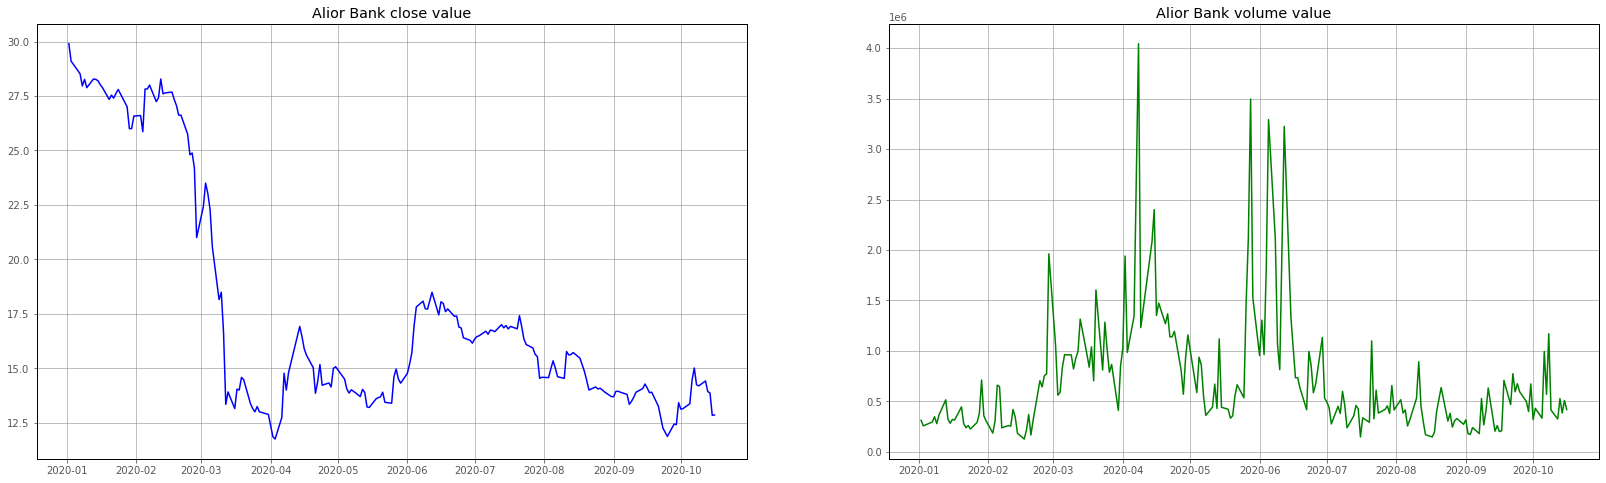

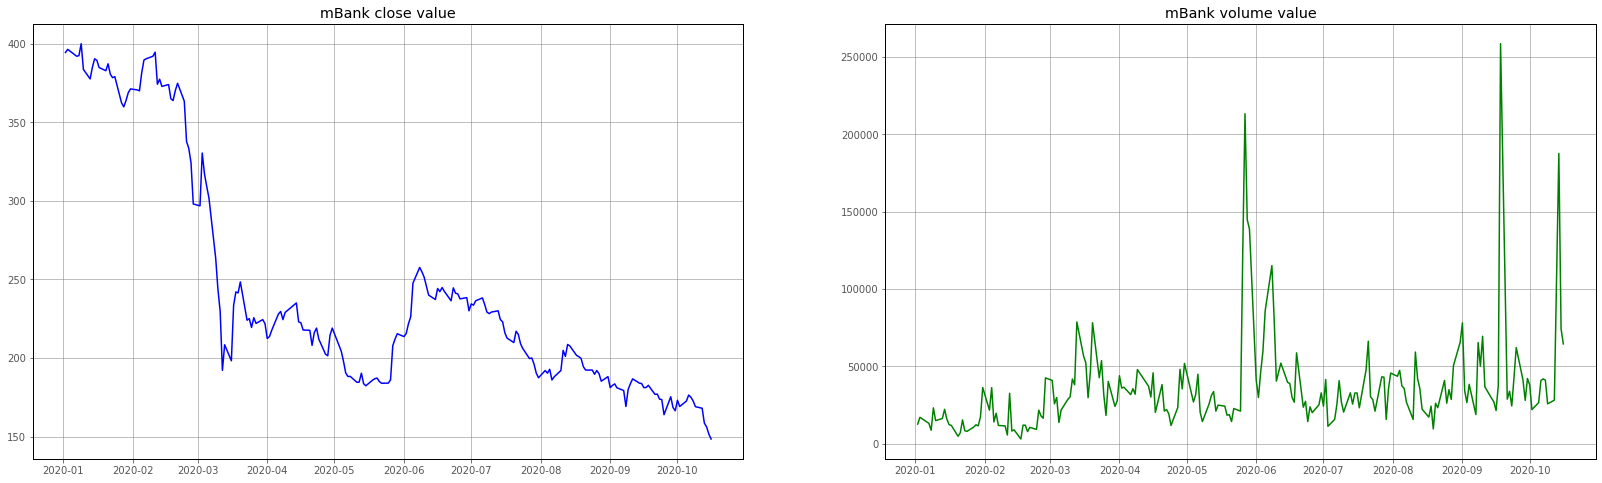

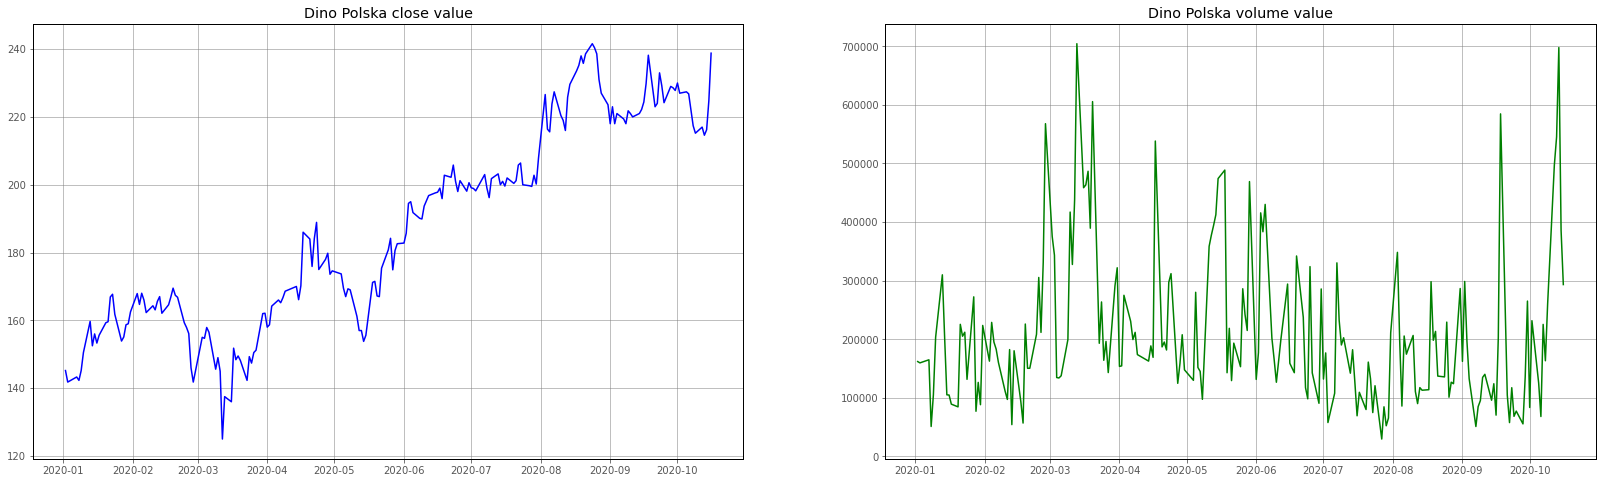

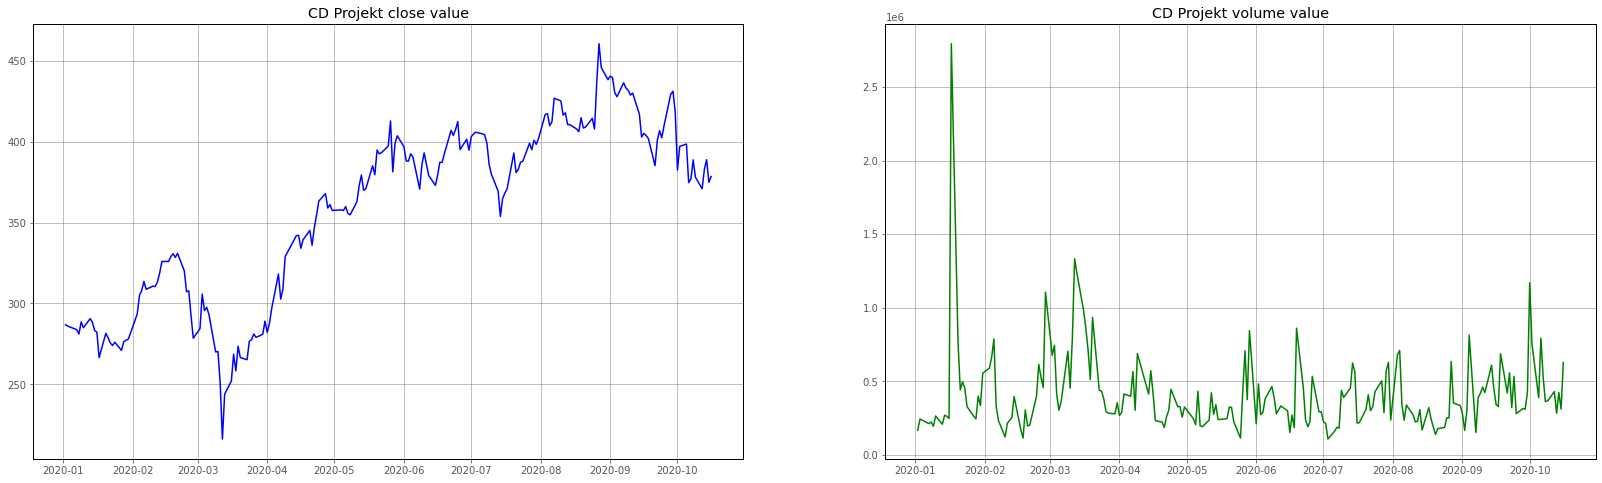

In [4]:
WIG20.stock_visualization('Alior Bank')
WIG20.stock_visualization('mBank')
WIG20.stock_visualization('Dino Polska')
WIG20.stock_visualization('CD Projekt')

In [5]:
#Our Investment
stocks = ['Alior Bank','mBank','Dino Polska','CD Projekt']
values_investment = [1250,1250,2500,5000]
investment = WIG20.creat_investment(stocks,values_investment) # With columns Stock - stocks and Value - value_investment

#Benchmark
benchmark = ['WIG20']
sum_investment = investment['Value'].sum() # If Benchmark have more than one company change like up

#Date our investment
date = dt.datetime(2020,6,1)

#Creat portfolio
bemchmark_portfolio = WIG20.preparing_portfolio_by_date(sum_investment,benchmark,dt.datetime(2020,6,1))
my_portfolio = WIG20.preparing_portfolio_by_date(investment['Value'].values, investment['Stock'],dt.datetime(2020,6,1))

--------------------------------------------------
At 2020-06-01 We first want to inveset 10000.0 PLN
We get
5 stocks WIG20 for 1733.52 PLN total 8667.6 PLN
and the rest from investment 1332.4 PLN
--------------------------------------------------
At 2020-06-01 We first want to inveset 10000.0 PLN
We get
84 stocks Alior Bank for 14.765 PLN total 1240.26 PLN
12 stocks CD Projekt for 396.9 PLN total 4762.8 PLN
13 stocks Dino Polska for 182.8 PLN total 2376.4 PLN
5 stocks mBank for 213.6 PLN total 1068.0 PLN
and the rest from investment 552.54 PLN


--------------------------------------------------
At 2020-06-01 We invested 9447.46 PLN, spliced by company
1240.26 PLN at stocks Alior Bank
4762.8 PLN at stocks CD Projekt
2376.4 PLN at stocks Dino Polska
1068.0 PLN at stocks mBank
--------------------------------------------------
We have 
84 stocks Alior Bank
12 stocks CD Projekt
12 stocks Dino Polska
4 stocks mBank
--------------------------------------------------
On 2020-10-16 it is all worth 9453.69 PLN,spliced by company
1079.03 PLN at stocks Alior Bank
4524.66 PLN at stocks CD Projekt
3113.08 PLN at stocks Dino Polska
736.92 PLN at stocks mBank
--------------------------------------------------
Rate of investment is 0.07 %, spliced by comapny
-13.0 % at stocks Alior Bank
-5.0 % at stocks CD Projekt
31.0 % at stocks Dino Polska
-31.0 % at stocks mBank
--------------------------------------------------



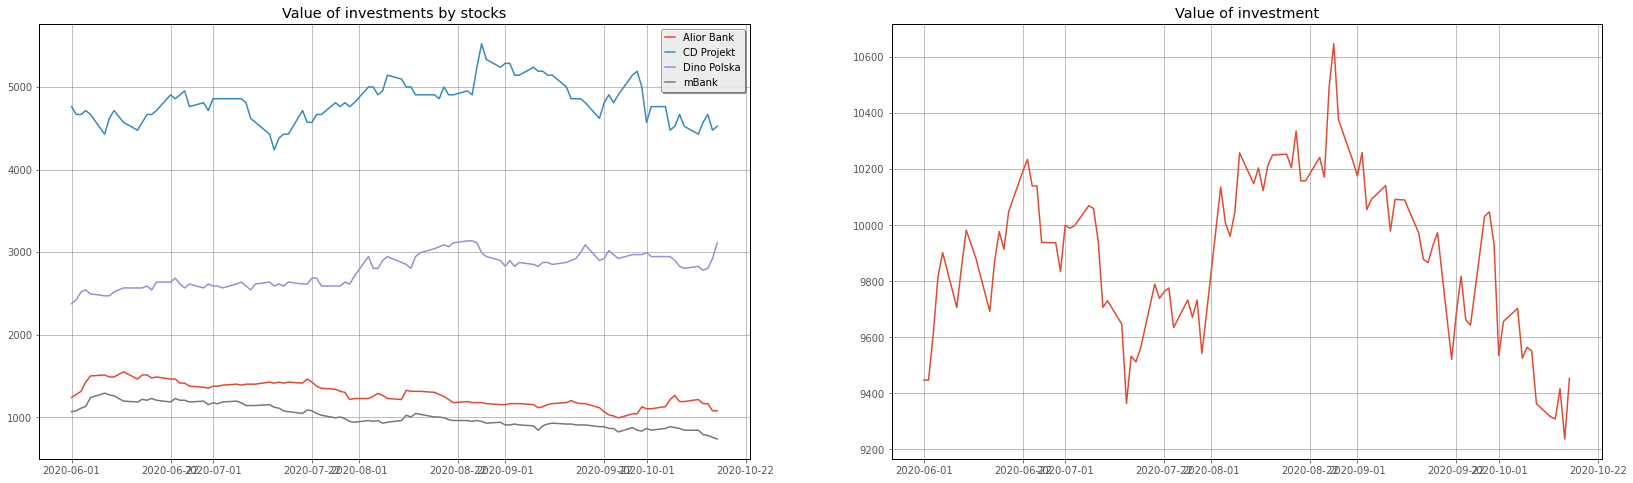

In [7]:
WIG20.portfolio_summary(my_portfolio)

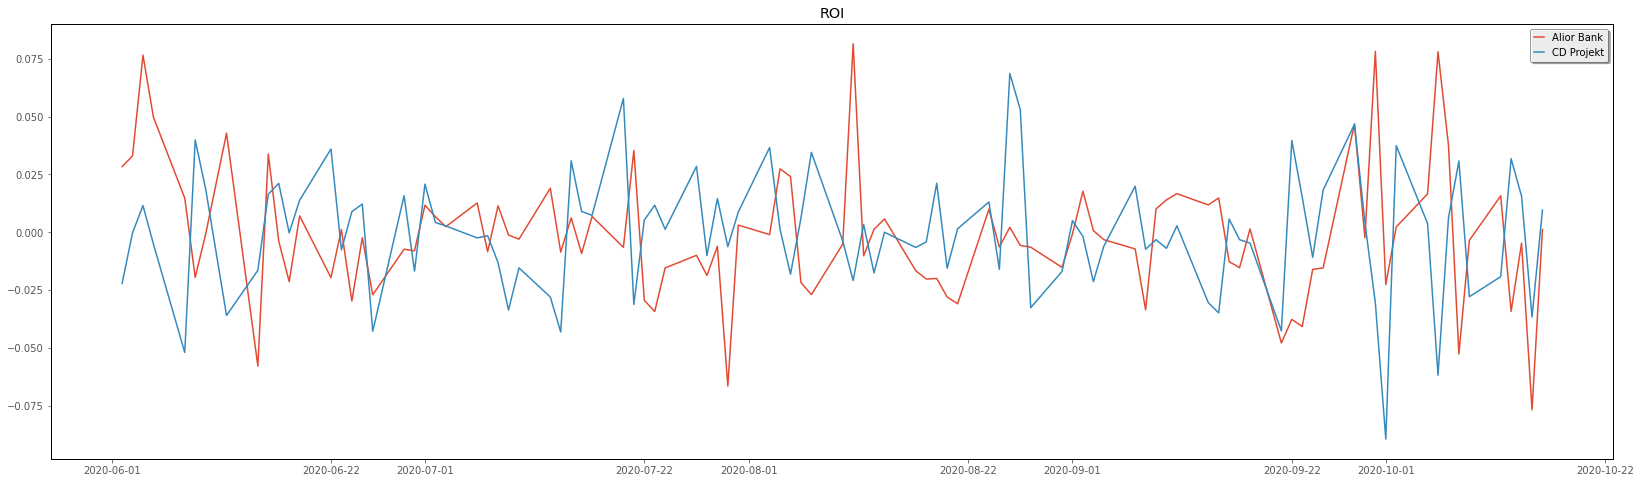

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


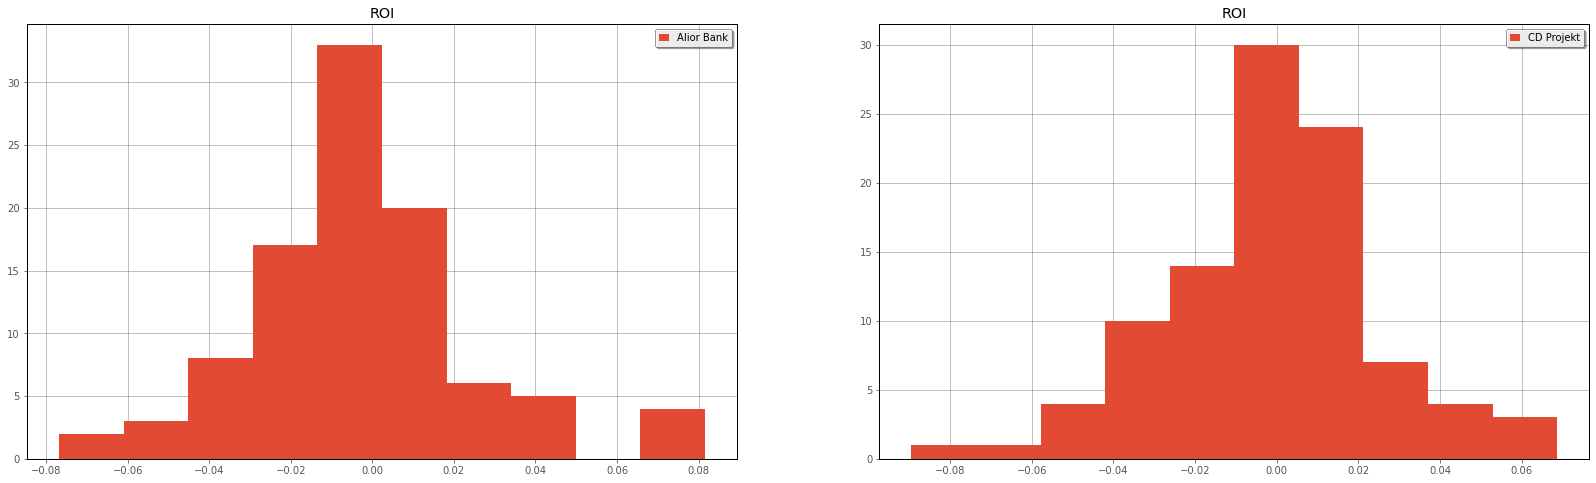

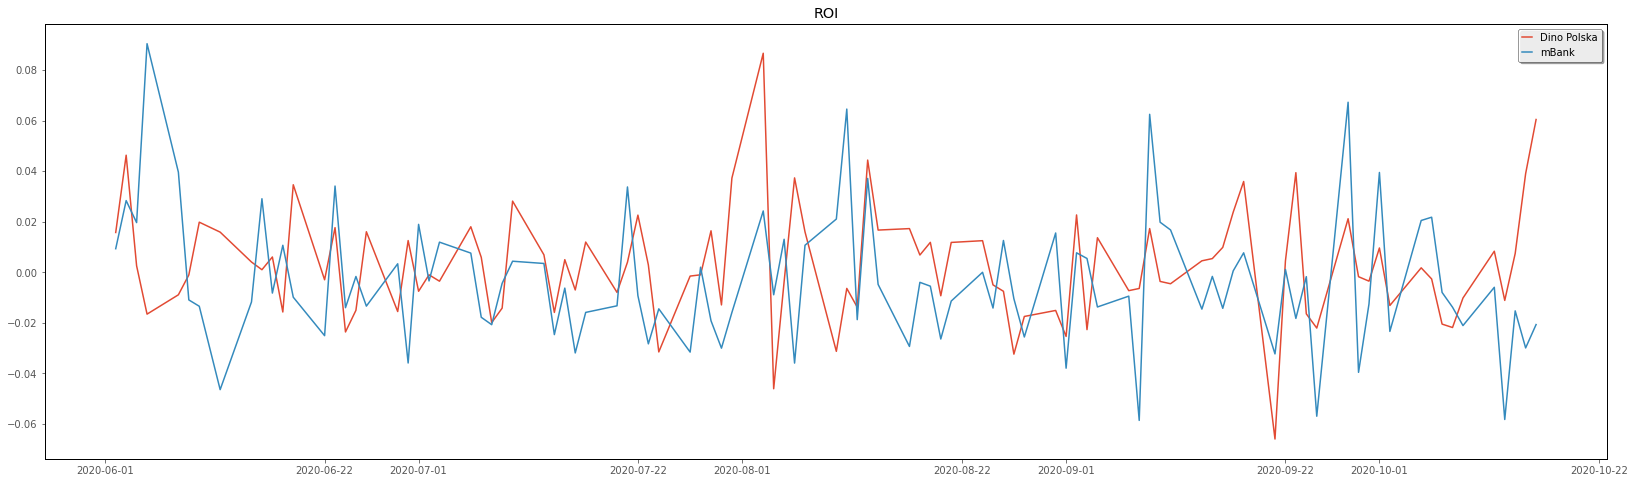

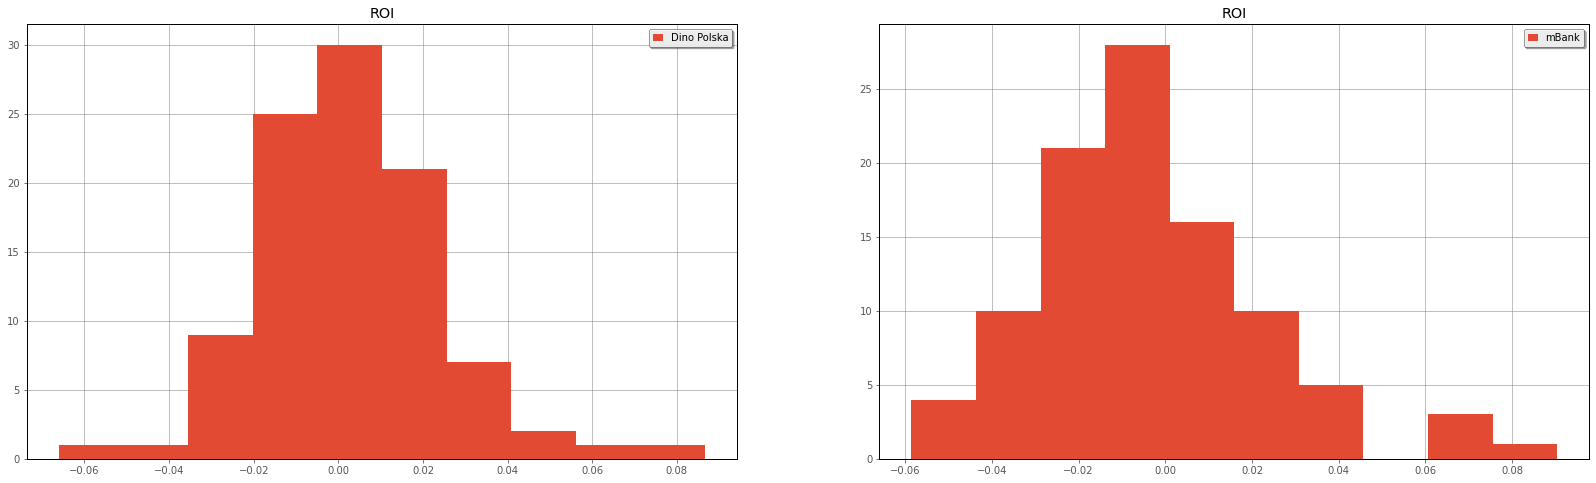

<Figure size 2016x576 with 0 Axes>

<Figure size 2016x576 with 0 Axes>

<Figure size 2016x576 with 0 Axes>

<Figure size 2016x576 with 0 Axes>

In [8]:
WIG20.portfolio_rate(my_portfolio)

# Prophet

In [20]:
#https://mode.com/example-gallery/forecasting_prophet_python_cookbook/
import math
import fbprophet
import numpy as np
import pandas as pd
import datetime as dt
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.special import inv_boxcox
from matplotlib.ticker import StrMethodFormatter
from fbprophet.diagnostics import cross_validation

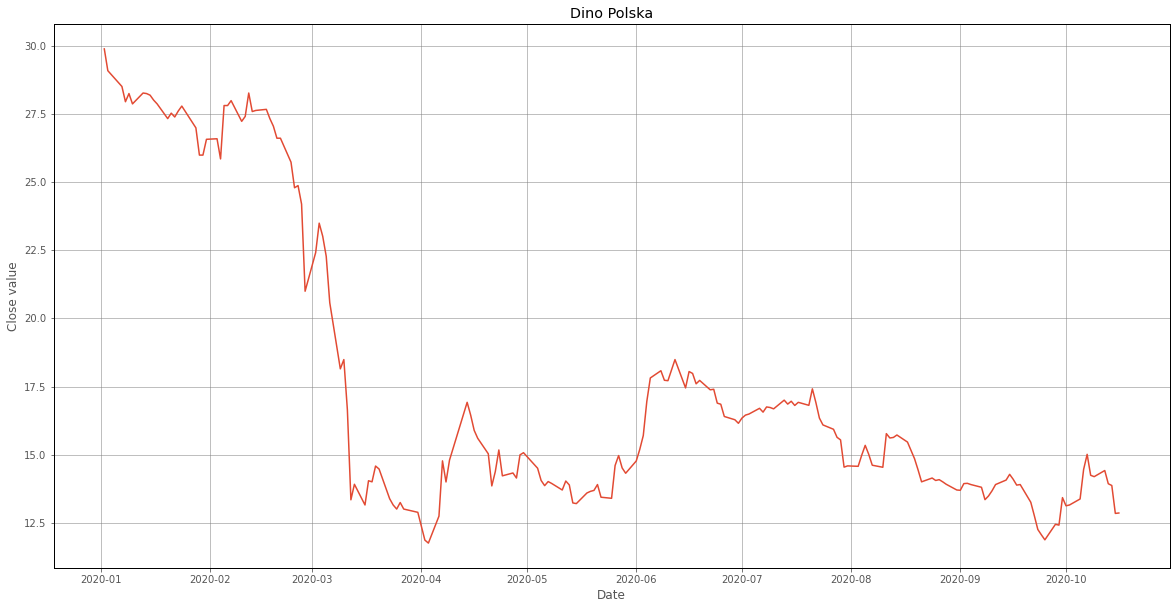

In [21]:
df = WIG20.WIG20_by_stocks.get_group('Alior Bank')
df =df[['Close']]
plt.figure(figsize=(20,10))
plt.title('Dino Polska')
plt.xlabel('Date')
plt.ylabel('Close value')
plt.grid()
plt.plot(df)

In [22]:
# Create new ds column from date
df['ds'] = df.index

# Create new y column from value
df['y'] = df['Close']


df.tail()

,Close,ds,y
Date,,,
2020-10-12,14.415,2020-10-12,14.415
2020-10-13,13.930,2020-10-13,13.930
2020-10-14,13.865,2020-10-14,13.865
2020-10-15,12.840,2020-10-15,12.840
2020-10-16,12.855,2020-10-16,12.855


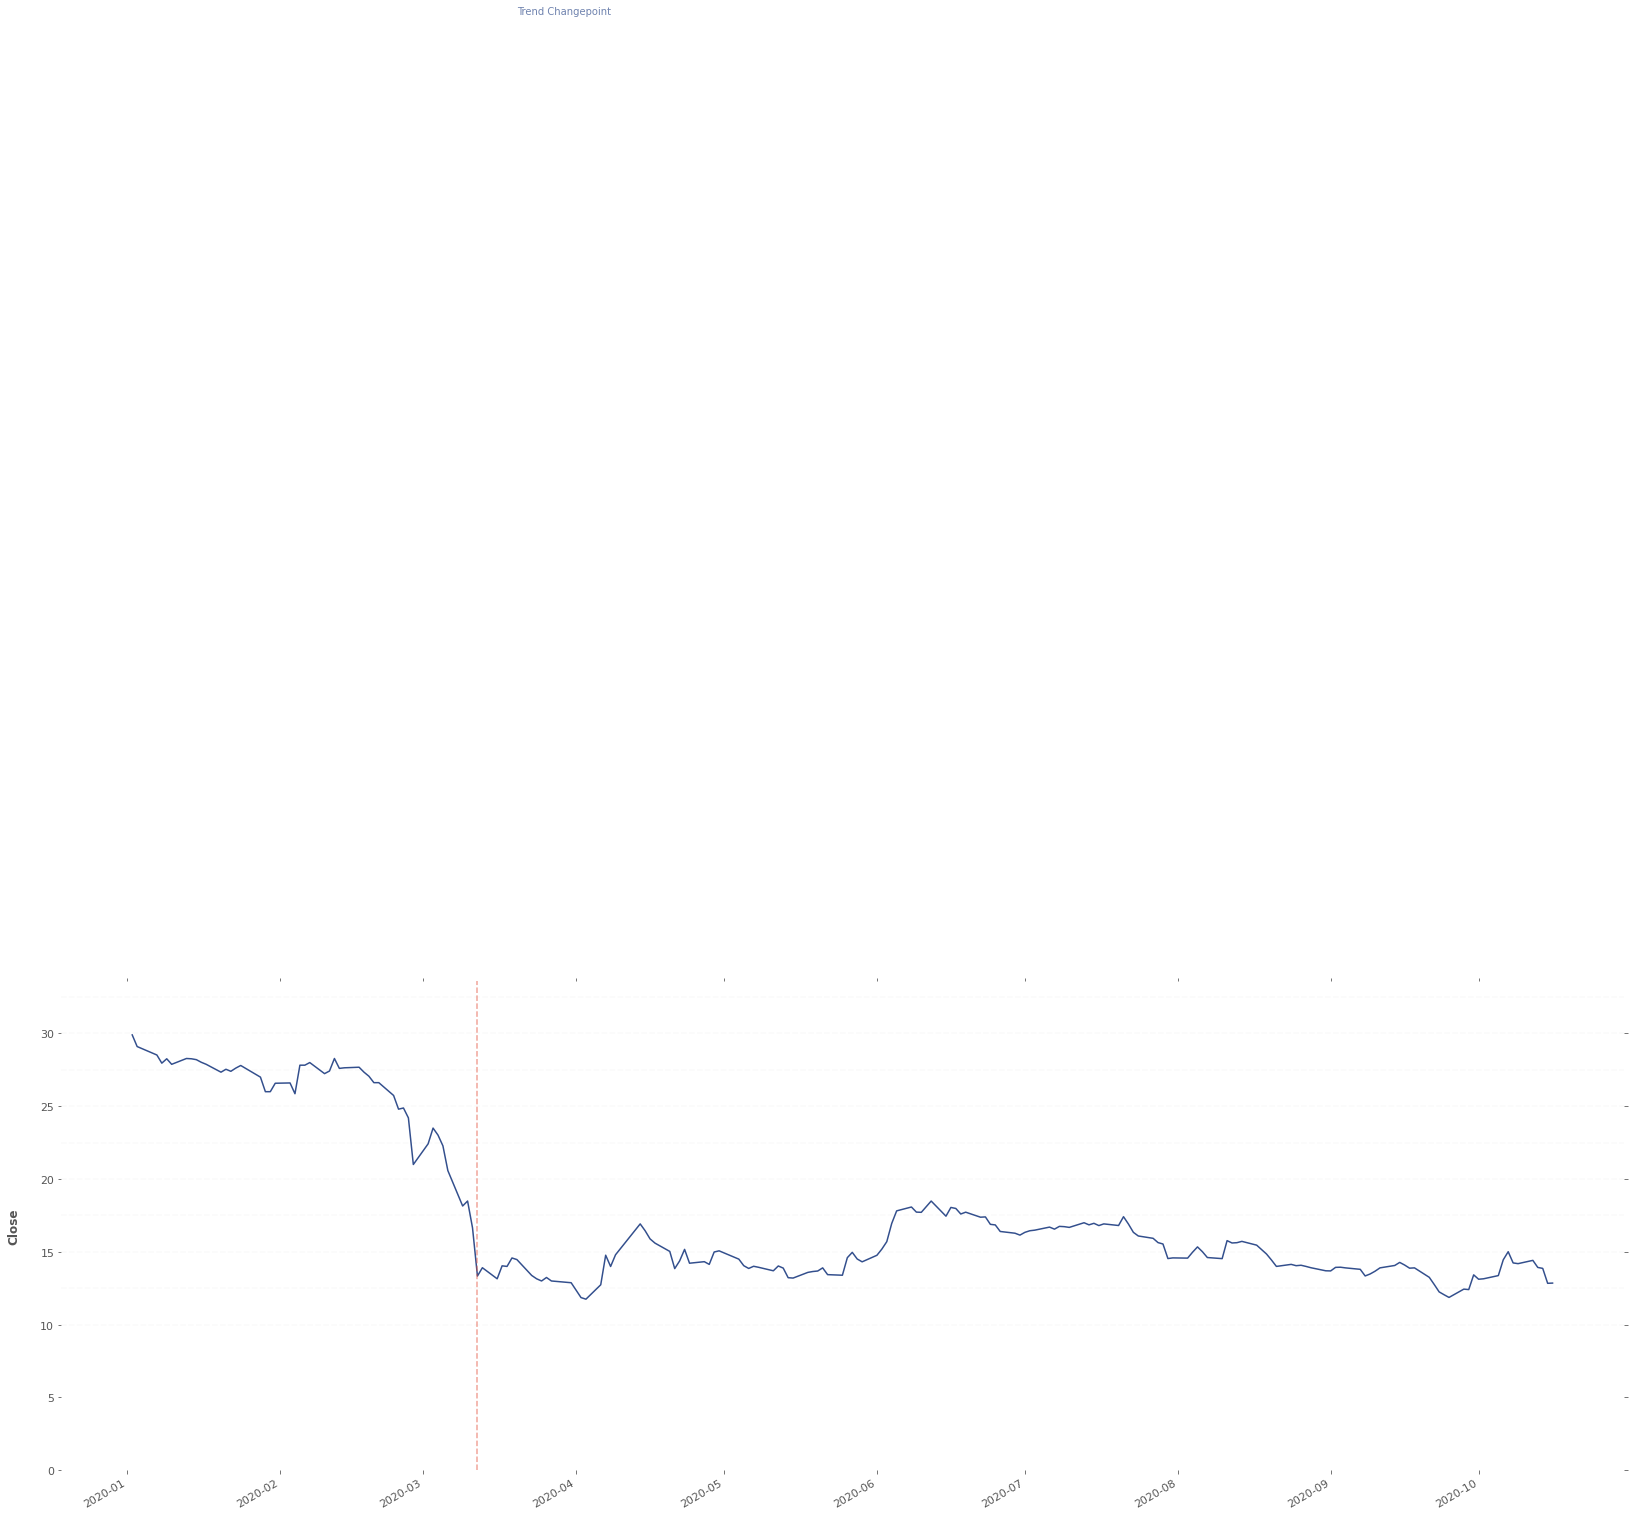

In [23]:
# Create figure and subplot
plt.figure(figsize=(28,10))
ax = plt.subplot(111)

# Plot
df['Close'].plot(color='#334f8d', fontsize=11, zorder=2, ax=ax)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x-axis label
ax.set_xlabel('')

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Annotate
x_line_annotation = dt.datetime(2020, 3, 12) 
x_text_annotation = dt.datetime(2020, 3, 20)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.5)
ax.text(x=x_text_annotation, y=100, s='Trend Changepoint', alpha=0.7, color='#334f8d')

# Get y-axis tick values
vals = ax.get_yticks()

# Draw horizontal axis lines
for val in vals:
    ax.axhline(y=val, linestyle='dashed', alpha=0.3, color='#eeeeee', zorder=1)

# Format y-axis label
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Set y-axis label
ax.set_ylabel("Close", labelpad=20, weight='bold')

# Set y-axis limit
ylim = ax.set_ylim(bottom=0)

In [24]:
# Apply Box-Cox Transform to Close column
df['y'], lam = boxcox(df['Close'])

# Print lambda value
print('Lambda: {}'.format(lam))

Lambda: -2.400921333520554


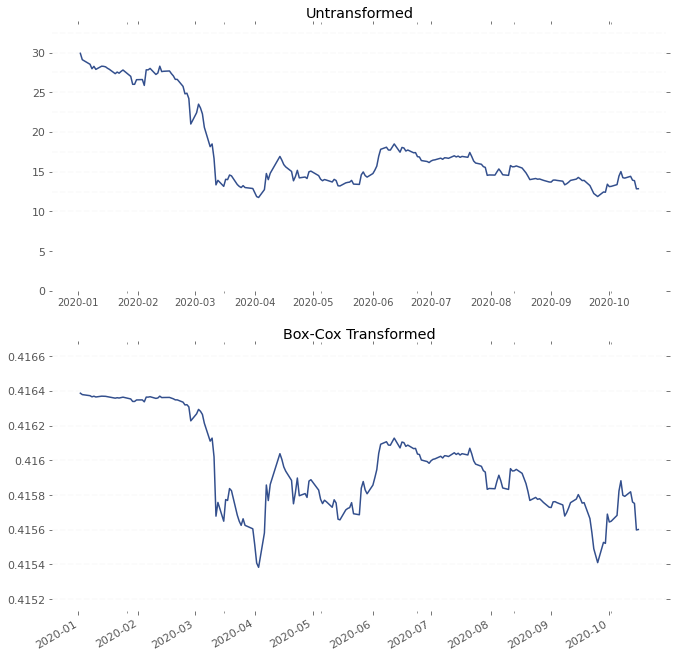

In [25]:
ax = df[['Close','y']].plot(color='#334f8d', subplots=True, sharex=True, fontsize=11, legend=False, figsize=(11,12), title=['Untransformed','Box-Cox Transformed'])

for i, x in enumerate(ax):
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    x.spines['bottom'].set_visible(False)

    # Remove x-axis label
    x.set_xlabel('')

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Format y-axis ticks
    vals = x.get_yticks()
    x.set_yticklabels(['{:,}'.format(int(y)) for y in vals])

    # Draw horizontal axis lines
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.3, color='#eeeeee', zorder=1)
        
    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    # Set y-axis limit
    if i == 0:
      x.set_ylim(bottom=0)

In [26]:
# Instantiate Prophet object
m = fbprophet.Prophet()

# Call fit method on Prophet object and pass in prepared dataframe. This is where model fitting is performed
m.fit(df)

# Create a dataframe with ds extending the chosen number of periods into the future
future = m.make_future_dataframe(periods=30)

# Create the forecast
forecast = m.predict(future)

forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,0.416262,0.416294,0.416470,0.416262,0.416262,0.000120,0.000120,0.000120,0.000120,0.000120,0.000120,0.0,0.0,0.0,0.416382
1,2020-01-03,0.416260,0.416286,0.416451,0.416260,0.416260,0.000108,0.000108,0.000108,0.000108,0.000108,0.000108,0.0,0.0,0.0,0.416369
2,2020-01-07,0.416255,0.416304,0.416471,0.416255,0.416255,0.000132,0.000132,0.000132,0.000132,0.000132,0.000132,0.0,0.0,0.0,0.416387
3,2020-01-08,0.416253,0.416294,0.416476,0.416253,0.416253,0.000134,0.000134,0.000134,0.000134,0.000134,0.000134,0.0,0.0,0.0,0.416388
4,2020-01-09,0.416252,0.416288,0.416458,0.416252,0.416252,0.000120,0.000120,0.000120,0.000120,0.000120,0.000120,0.0,0.0,0.0,0.416371


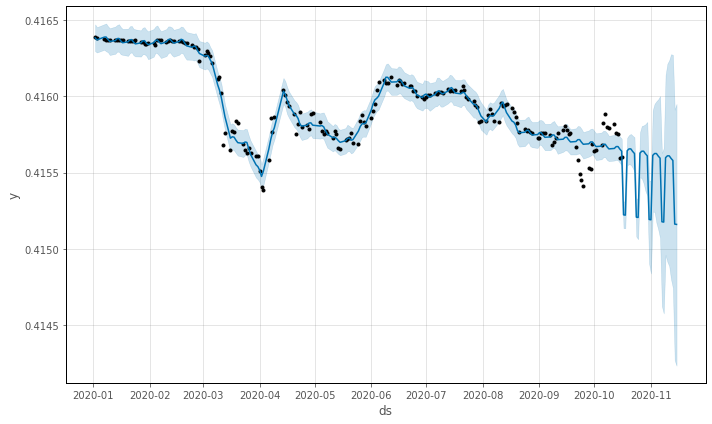

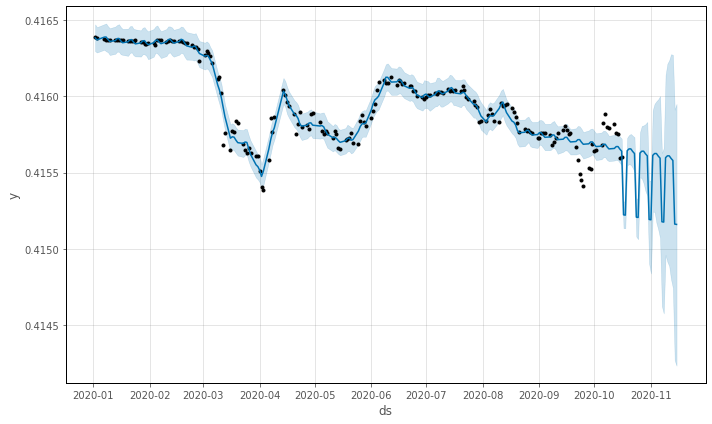

In [27]:
m.plot(forecast)

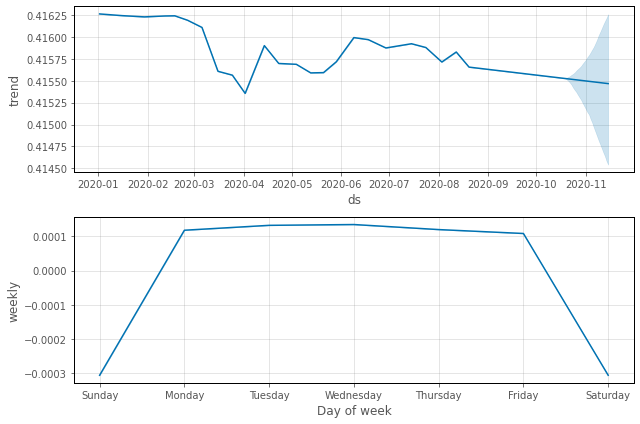

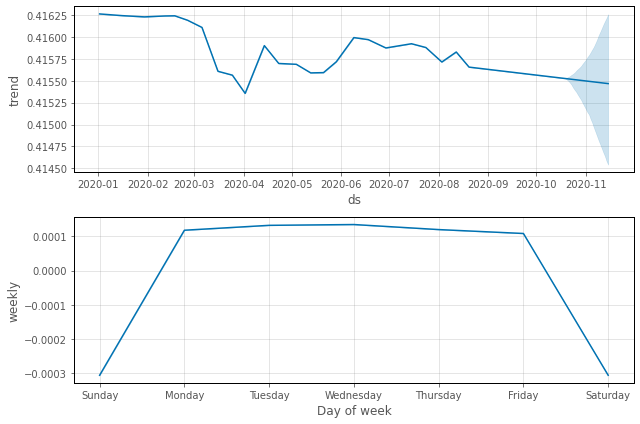

In [28]:
m.plot_components(forecast)

In [29]:
# Apply inverse Box-Cox transform to specific columns
forecast[['yhat','yhat_upper','yhat_lower']] = forecast[['yhat','yhat_upper','yhat_lower']].apply(lambda x: inv_boxcox(x, lam))
forecast = forecast[['ds','yhat','yhat_lower','yhat_upper']]
forecast = forecast.set_index('ds')

forecast.tail()

,yhat,yhat_lower,yhat_upper
ds,,,
2020-11-11,12.906676,10.092850,21.231594
2020-11-12,12.806836,9.876813,22.666806
2020-11-13,12.728292,9.744754,22.494800
2020-11-14,10.906836,8.823576,15.313671
2020-11-15,10.899532,8.766274,15.733579


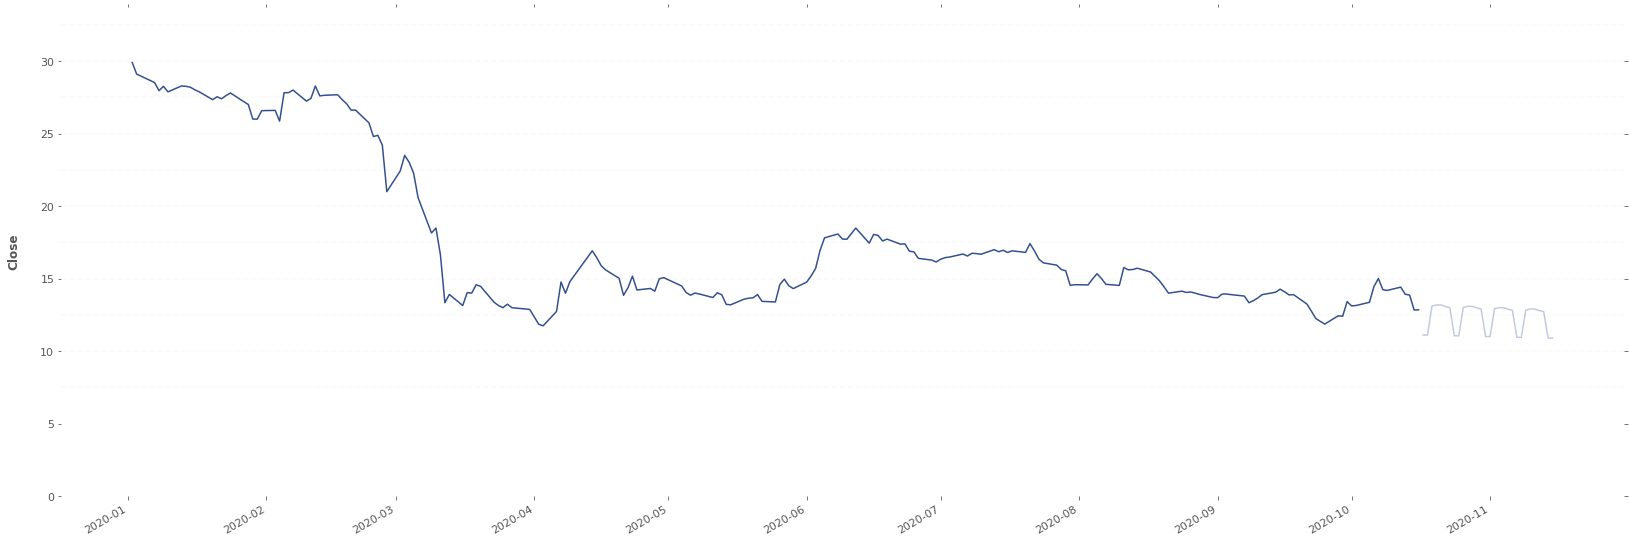

In [30]:
# Create figure and subplot
plt.figure(figsize=(28,10))
ax = plt.subplot(111)

# Plot
df['Close'].plot(color='#334f8d', fontsize=11, zorder=2, ax=ax)
forecast['yhat'][forecast.index > df.index.max()].plot(color='#334f8d', alpha=0.3, fontsize=11, zorder=2, ax=ax)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x-axis label
ax.set_xlabel('')

# Change the facecolor
# ax.set_facecolor('#f7f7f9')

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Get y-axis tick values
vals = ax.get_yticks()

# Draw horizontal axis lines
for val in vals:
    ax.axhline(y=val, linestyle='dashed', alpha=0.3, color='#eeeeee', zorder=1)

# Format y-axis label
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Set y-axis label
ax.set_ylabel("Close", labelpad=20, weight='bold')

# Set y-axis limit
ylim = ax.set_ylim(bottom=0)